In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pylab


import geopandas 

In [23]:
boundary = geopandas.read_file('geo_com_boundaries.geojson')

In [26]:
com = pd.read_csv('data_com_rate.csv')

In [27]:
boundary.head()

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,(POLYGON ((-87.60914087617894 41.8446925026539...
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,(POLYGON ((-87.59215283879394 41.8169293462668...
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,(POLYGON ((-87.62879823733725 41.8018930336891...
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,(POLYGON ((-87.6067081256125 41.81681377057218...
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,(POLYGON ((-87.59215283879394 41.8169293462668...


In [28]:
com.rename(columns={'Community Area Name':'community'},inplace=True)

In [29]:
com['community'] = com['community'].str.upper() 

In [30]:
boundary = pd.merge(boundary, com, on="community", how="inner")

In [32]:
socio = pd.read_excel('data_MasterSet_wCrime.xlsx')

In [33]:
socio['Community Area Name']= socio['Community Area Name'].str.upper()
socio.rename(columns={"Community Area Name": "community"}, inplace=True)

In [34]:
socio.head()

,community,TOT_POP,MED_AGE,UND19,A20_34,A35_49,WHITE,HISP,BLACK,ASIAN,...,CRIM SEXUAL ASSAULT,PUBLIC PEACE VIOLATION,OFFENSE INVOLVING CHILDREN,INTERFERENCE WITH PUBLIC OFFICER,OBSCENITY,STALKING,KIDNAPPING,ARSON,INTIMIDATION,GAMBLING
0,ALBANY PARK,51575,33.6,13354,13738,11975,14932,24892,2337,7883,...,86,132,154,34,2,6,15,32,15,5
1,ARCHER HEIGHTS,13233,33.0,4016,2933,2879,2477,10178,79,439,...,30,67,66,10,3,4,16,13,6,1
2,ARMOUR SQUARE,13699,42.0,2997,2824,2539,1599,423,1248,10299,...,25,44,29,18,1,5,1,4,8,5
3,ASHBURN,43283,35.5,12983,8368,8998,5044,16374,20721,314,...,80,144,171,21,13,14,24,35,10,14
4,AUBURN GRESHAM,45770,39.6,11432,9224,7941,257,614,44267,153,...,295,448,520,360,3,36,43,89,17,50


In [35]:
boundary = pd.merge(boundary, socio, on="community", how="inner") 

In [36]:
type(boundary)
type(boundary.geometry)
type(boundary.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

Text(0.5,1,'Arrest Rates by Community Area')

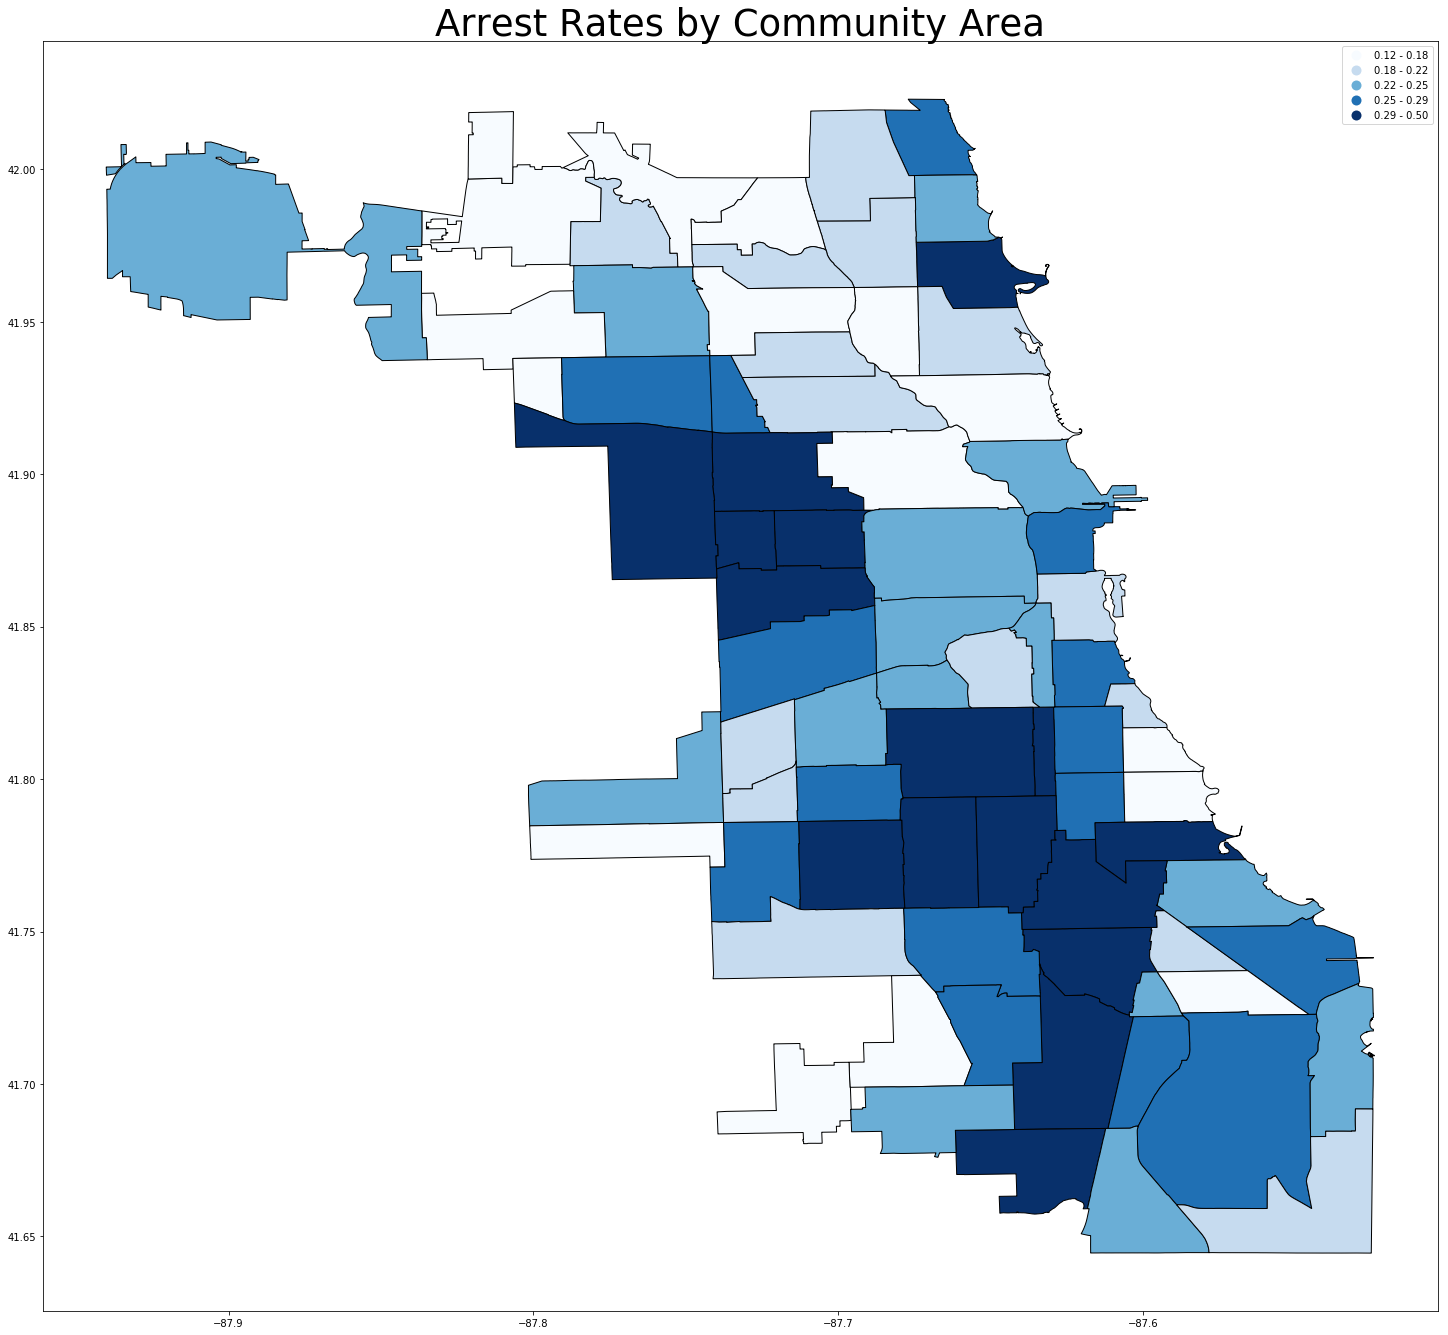

In [37]:
axes=boundary.plot(column='rate',figsize=(25,25),legend=True,colormap=plt.cm.Blues,scheme='quantiles',edgecolor='black')
axes.set_title("Arrest Rates by Community Area",fontsize=37)
#plt.savefig("FINAL_com_rate.csv")

In [40]:
list(boundary.columns)

[u'community',
 u'area',
 u'shape_area',
 u'perimeter',
 u'area_num_1',
 u'area_numbe',
 u'comarea_id',
 u'comarea',
 u'shape_len',
 'geometry',
 'Arrest',
 'ID',
 'rate',
 u'TOT_POP',
 u'MED_AGE',
 u'UND19',
 u'A20_34',
 u'A35_49',
 u'WHITE',
 u'HISP',
 u'BLACK',
 u'ASIAN',
 u'OTHER',
 u'POP_16OV',
 u'IN_LBFRC',
 u'EMP',
 u'UNEMP',
 u'NOT_IN_LBFRC',
 u'POP_25OV',
 u'LT_HS',
 u'HS',
 u'SOME_COLL',
 u'ASSOC',
 u'BACH',
 u'GRAD_PROF',
 u'INC_LT_25K',
 u'INC_25_50K',
 u'INC_50_75K',
 u'INC_75_100K',
 u'INC_100_150K',
 u'INC_GT_150',
 u'MEDINC',
 u'TOT_HH',
 u'VAC_HU',
 u'FAM_HH',
 u'SP_WCHILD_HH',
 u'NONFAM_HH',
 u'Per_HH_Crowded',
 u'Per_HH_BelowPov',
 u'PER CAPITA INCOME ',
 u'HARDSHIP_INDEX',
 u'Birth Rate',
 u'General Fertility Rate',
 u'Teen Birth Rate',
 u'Preterm Births',
 u'Infant Mortality Rate',
 u'Mort_homicide',
 u'Mort_diabetes',
 u'Mort_Firearm',
 u'Life_Exp_10',
 u'ASSAULT',
 u'BATTERY',
 u'HOMICIDE',
 u'THEFT',
 u'ROBBERY',
 u'BURGLARY',
 u'MOTOR VEHICLE THEFT',
 u'NARCOTI

Text(0.5,1,'PCI by Community Area')

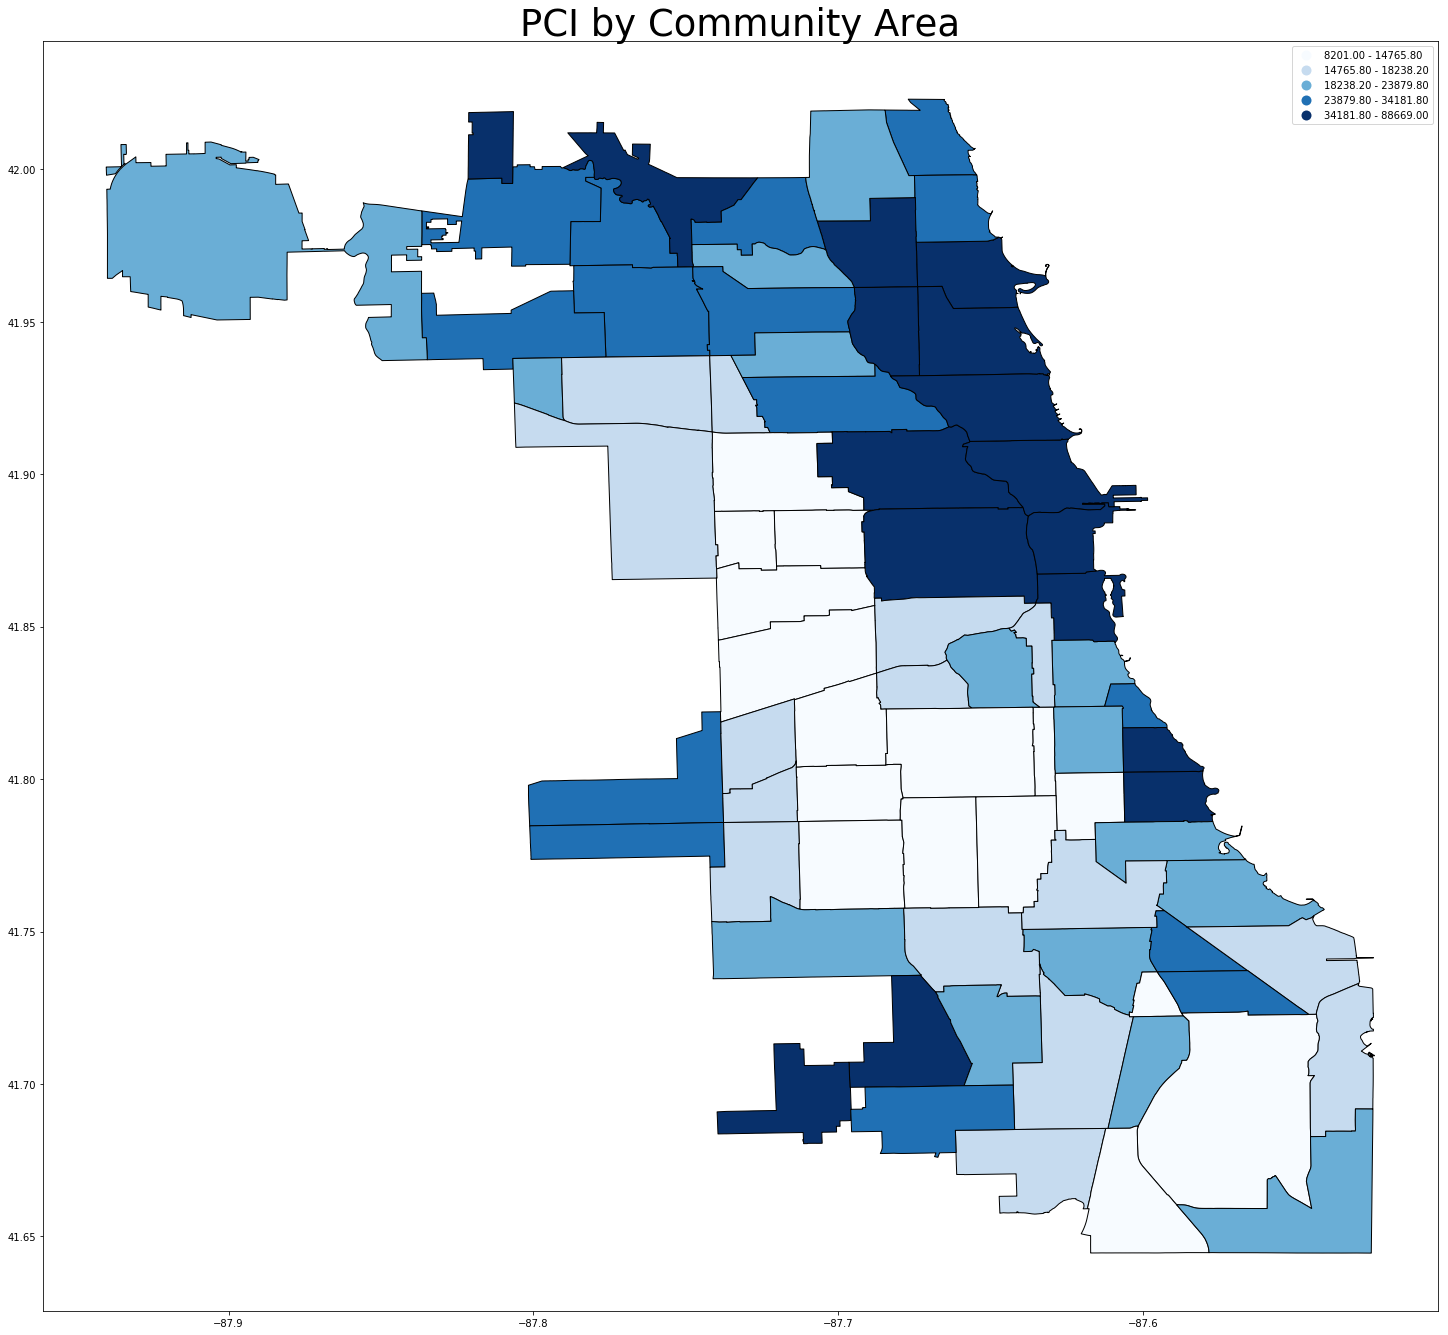

In [41]:
axes=boundary.plot(column='PER CAPITA INCOME ',figsize=(25,25),legend=True,colormap=plt.cm.Blues,scheme='quantiles',edgecolor='black')
axes.set_title("PCI by Community Area",fontsize=37)
#plt.savefig("FINAL_com_pci.png")

In [43]:
pci = pd.read_csv('data_pci.csv')
pci.rename({"PER CAPITA INCOME ": "pci"}, axis = 'columns', inplace=True )

Text(0,0.5,'Per Capita Income')

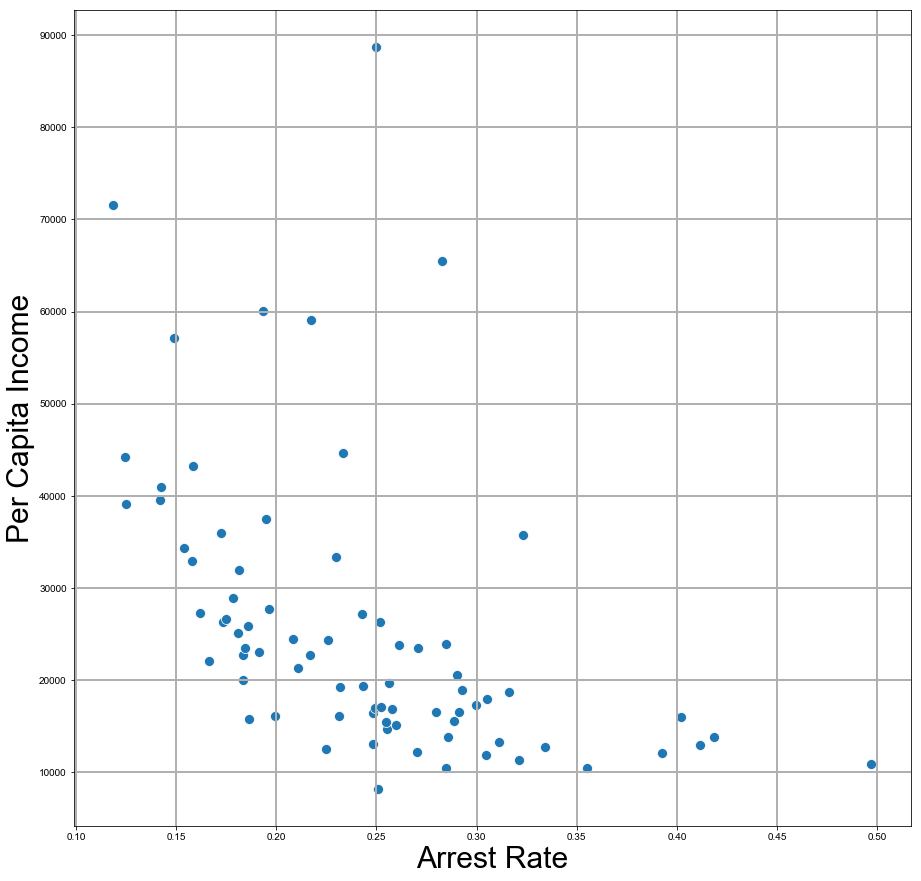

In [44]:
fig,ax=plt.subplots(figsize=(15,15))
sns.set_style("darkgrid")
ax = sns.scatterplot(x="rate", y="pci", s=100 ,data=pci)
ax.grid(True,axis='both',linewidth=2)
ax.set_xlabel('Arrest Rate',fontsize=30)
ax.set_ylabel('Per Capita Income',fontsize=30)
#plt.savefig("FINAL_pci_rate_scatter.png")

In [45]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [46]:
pci['rate']=pci['rate']*100
pci.head()

,Unnamed: 0,pci,Arrest,ID,rate
0,0,8201,1254.0,5003,25.064961
1,1,10402,4974.0,17468,28.474926
2,2,10432,1281.0,3606,35.524126
3,3,10934,11070.0,22270,49.708128
4,4,11317,9609.0,29928,32.107057


In [47]:
pci['pci']=pci['pci']/1000

In [48]:
pci.head()

,Unnamed: 0,pci,Arrest,ID,rate
0,0,8.201,1254.0,5003,25.064961
1,1,10.402,4974.0,17468,28.474926
2,2,10.432,1281.0,3606,35.524126
3,3,10.934,11070.0,22270,49.708128
4,4,11.317,9609.0,29928,32.107057


In [49]:
pci_rate=smf.ols('rate ~ pci + np.power(pci,2)',pci).fit()
pci_rate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     29.37
Date:                Fri, 10 May 2019   Prob (F-statistic):           4.08e-10
Time:                        09:34:41   Log-Likelihood:                -240.08
No. Observations:                  77   AIC:                             486.2
Df Residuals:                      74   BIC:                             493.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           41.2011      2.418     17.042      0.000      36.384      46.018
pci                 -0.9960      0.150     -6.653      0.000      -1.294      -0.698
np.power(pci, 2)     0.0096      0.002      5.325      0.000       0.006       0.013
==============================================================================
Omnibus:                       15.257   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.191
Skew:                           1.026   Prob(JB):                     0.000185
Kurtosis:                       4.070   Cond. No.                     5.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
types = pd.read_csv('data_type_rate.csv')

In [52]:
types.head()

,Unnamed: 0,Primary Type,Incidents and Arrests,ID,rate
0,2,NARCOTICS,108823.0,109714,0.991879
1,9,BATTERY,44593.0,187643,0.237648
2,14,THEFT,26930.0,234716,0.114734
3,6,CRIMINAL TRESPASS,20174.0,27458,0.734722
4,8,ASSAULT,15943.0,63675,0.250381


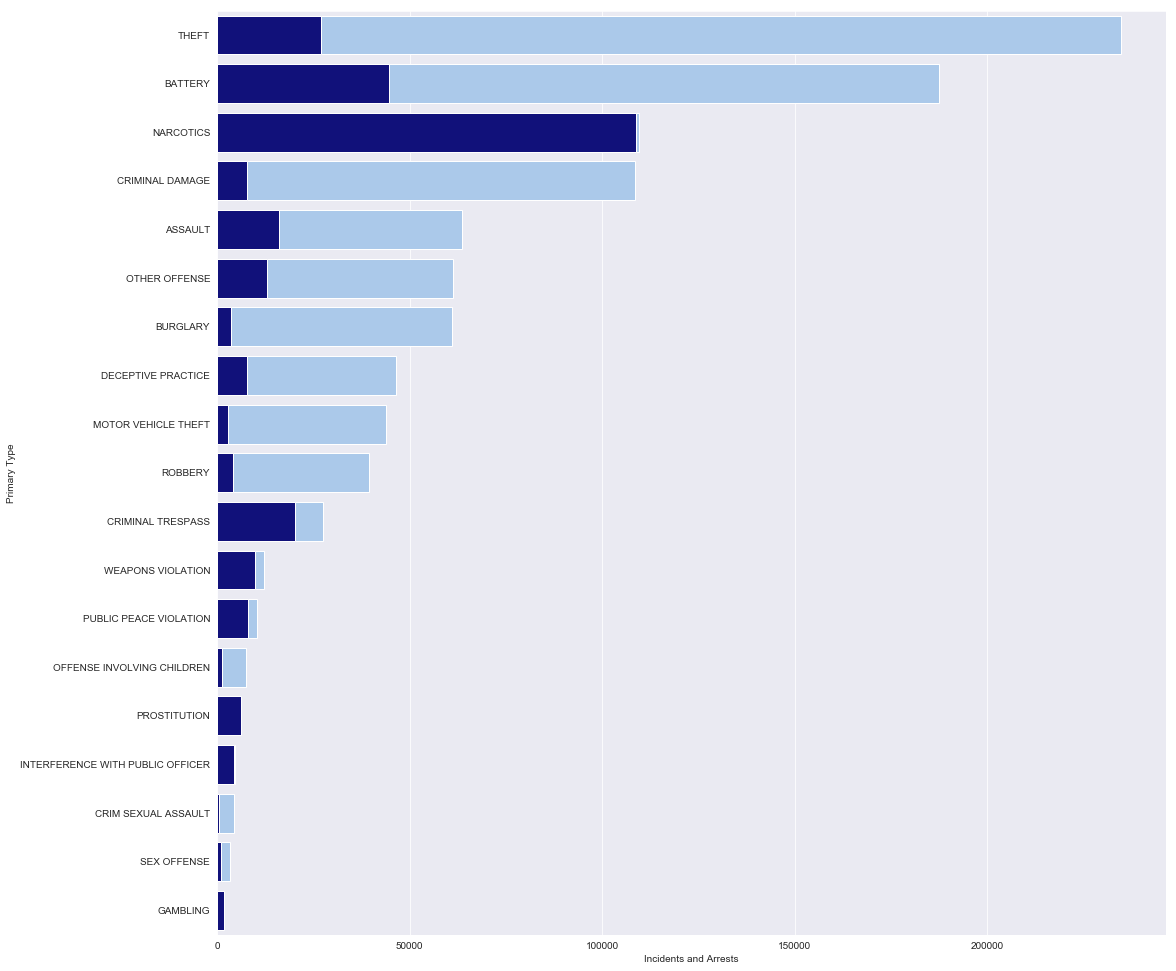

In [53]:
# Initialize the matplotlib figure
f, axes = plt.subplots(figsize=(17, 17))

# Load the example car crash dataset
types = types.sort_values("ID", ascending=False)


# Plot the crashes where alcohol was involved
sns.set_color_codes("pastel")
sns.barplot(x="ID", y="Primary Type", data=types,
            color="b")
sns.barplot(x="Incidents and Arrests", y="Primary Type", data=types,
            color="darkblue")

plt.rcParams.update({'font.size': 28})
#plt.savefig("FINAL_type_count.png")

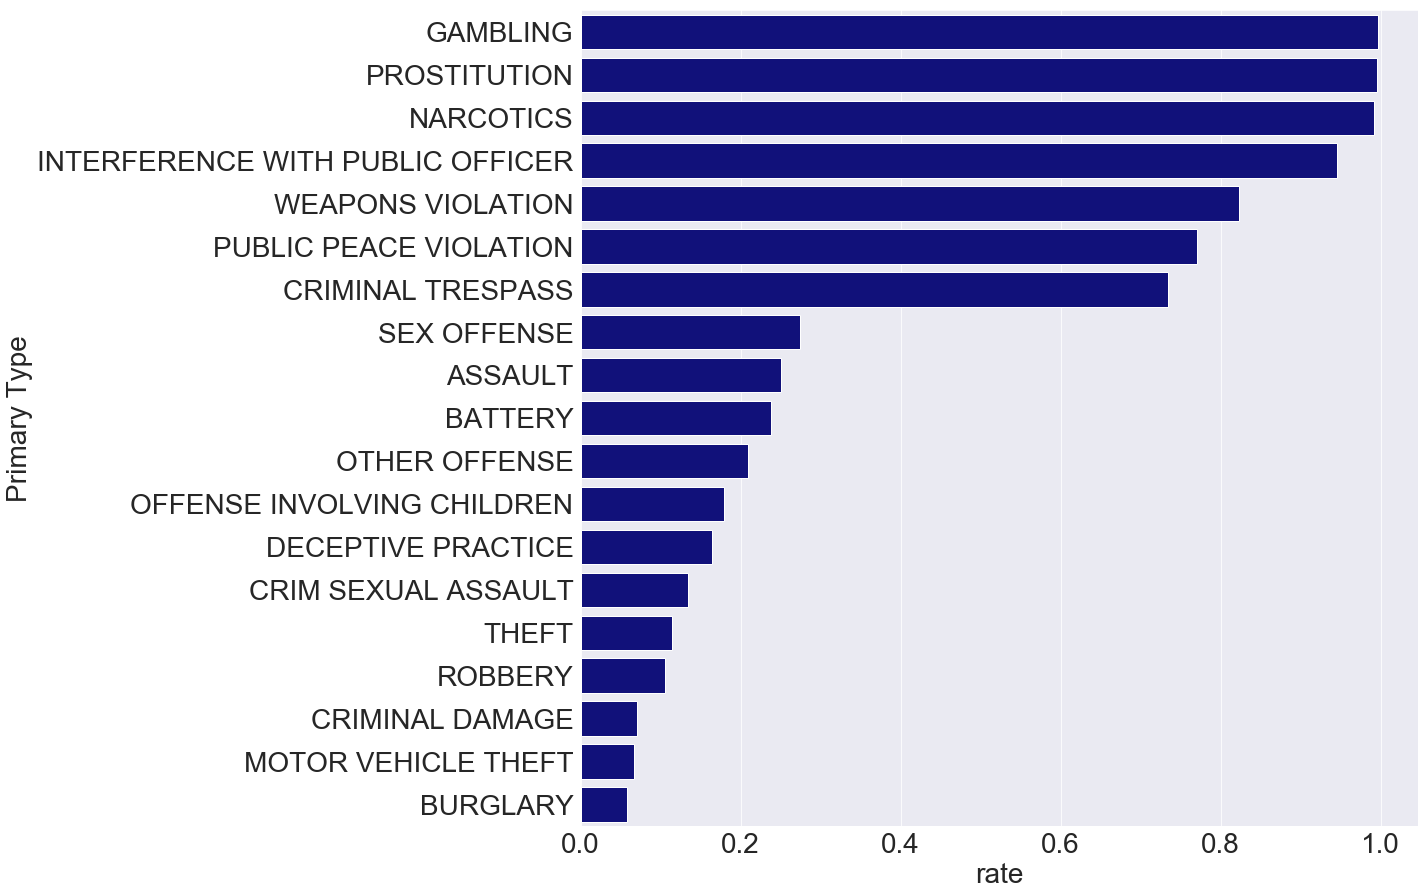

In [54]:
# Initialize the matplotlib figure
f, ax = plt.subplots(nrows=1,figsize=(15, 15))

# Load the example car crash dataset
types = types.sort_values("rate", ascending=False)

sns.barplot(x="rate", y="Primary Type", data=types, color="darkblue")
plt.rcParams.update({'font.size': 28})
#plt.savefig("FINAL_com_rate.png")

In [55]:
list(boundary.columns)

[u'community',
 u'area',
 u'shape_area',
 u'perimeter',
 u'area_num_1',
 u'area_numbe',
 u'comarea_id',
 u'comarea',
 u'shape_len',
 'geometry',
 'Arrest',
 'ID',
 'rate',
 u'TOT_POP',
 u'MED_AGE',
 u'UND19',
 u'A20_34',
 u'A35_49',
 u'WHITE',
 u'HISP',
 u'BLACK',
 u'ASIAN',
 u'OTHER',
 u'POP_16OV',
 u'IN_LBFRC',
 u'EMP',
 u'UNEMP',
 u'NOT_IN_LBFRC',
 u'POP_25OV',
 u'LT_HS',
 u'HS',
 u'SOME_COLL',
 u'ASSOC',
 u'BACH',
 u'GRAD_PROF',
 u'INC_LT_25K',
 u'INC_25_50K',
 u'INC_50_75K',
 u'INC_75_100K',
 u'INC_100_150K',
 u'INC_GT_150',
 u'MEDINC',
 u'TOT_HH',
 u'VAC_HU',
 u'FAM_HH',
 u'SP_WCHILD_HH',
 u'NONFAM_HH',
 u'Per_HH_Crowded',
 u'Per_HH_BelowPov',
 u'PER CAPITA INCOME ',
 u'HARDSHIP_INDEX',
 u'Birth Rate',
 u'General Fertility Rate',
 u'Teen Birth Rate',
 u'Preterm Births',
 u'Infant Mortality Rate',
 u'Mort_homicide',
 u'Mort_diabetes',
 u'Mort_Firearm',
 u'Life_Exp_10',
 u'ASSAULT',
 u'BATTERY',
 u'HOMICIDE',
 u'THEFT',
 u'ROBBERY',
 u'BURGLARY',
 u'MOTOR VEHICLE THEFT',
 u'NARCOTI

In [56]:
boundary['highest']=boundary['GAMBLING']+boundary['PROSTITUTION']+boundary['NARCOTICS']+boundary['INTERFERENCE WITH PUBLIC OFFICER']+boundary['WEAPONS VIOLATION']
boundary['lowest']=boundary['BURGLARY']+boundary['MOTOR VEHICLE THEFT']+boundary['CRIMINAL DAMAGE']+boundary['ROBBERY']+boundary['THEFT']

In [58]:
total=boundary[[\
 u'community',\
 u'BATTERY',\
 u'HOMICIDE',\
 u'THEFT',\
 u'ROBBERY',\
 u'BURGLARY',\
 u'MOTOR VEHICLE THEFT',\
 u'NARCOTICS',\
 u'CRIMINAL TRESPASS',\
 u'WEAPONS VIOLATION',\
 u'CRIMINAL DAMAGE',\
 u'PROSTITUTION',\
 u'SEX OFFENSE',\
 u'CRIM SEXUAL ASSAULT',\
 u'PUBLIC PEACE VIOLATION',\
 u'OFFENSE INVOLVING CHILDREN',\
 u'INTERFERENCE WITH PUBLIC OFFICER',\
 u'OBSCENITY',\
 u'STALKING',\
 u'KIDNAPPING',\
 u'ARSON',\
 u'INTIMIDATION',\
 u'GAMBLING']]

In [59]:
total['total']=total.sum(axis = 1, skipna = True) 

/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
boundary['total']=total['total']

In [61]:
boundary['hi_per']=boundary['highest']/boundary['total']
boundary['lo_per']=boundary['lowest']/boundary['total']

In [62]:
boundary[['hi_per','lo_per']]

,hi_per,lo_per
0,0.072861,0.579547
1,0.124267,0.603400
2,0.143070,0.543369
3,0.121506,0.551579
4,0.055449,0.661906
5,0.051773,0.683390
6,0.114918,0.524374
7,0.018678,0.775971
8,0.141203,0.509210
9,0.091216,0.582545


Text(0.5,1,'Highest Category Percentage')

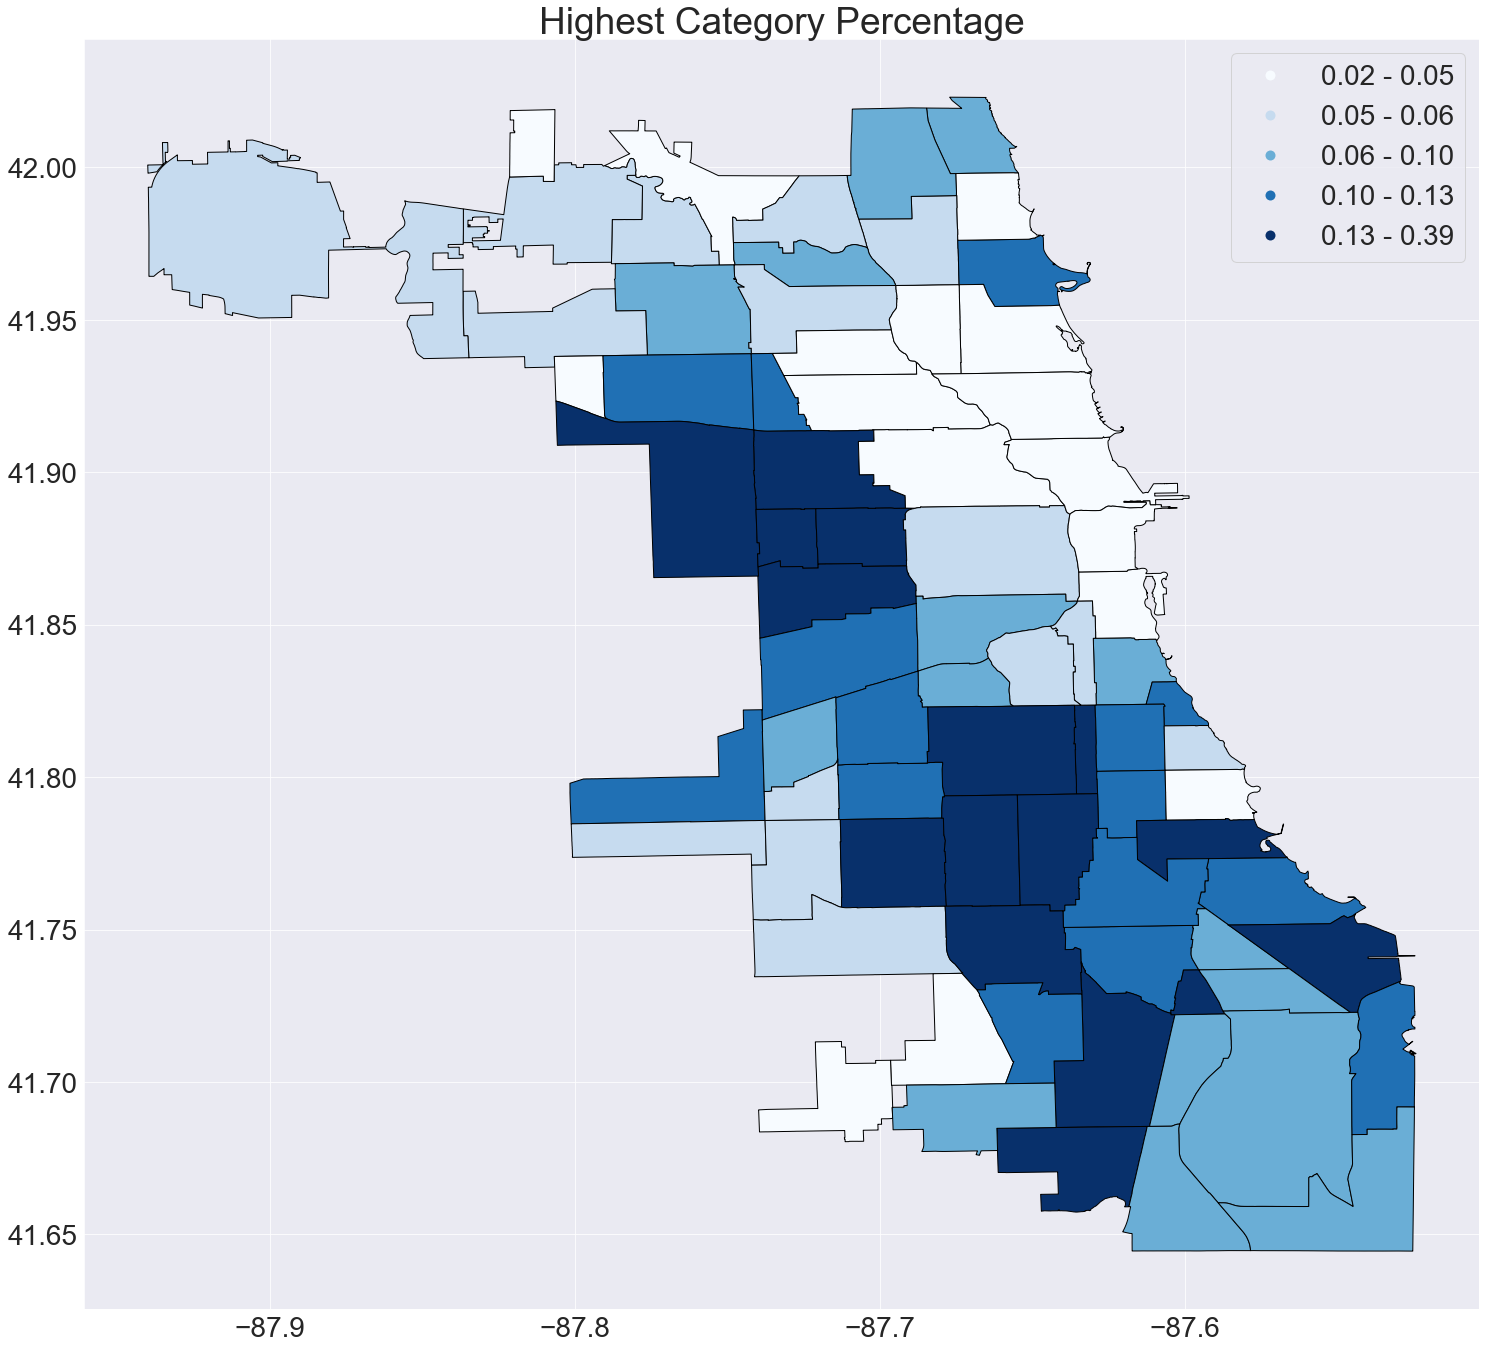

In [63]:
axes=boundary.plot(column='hi_per',figsize=(25,25),legend=True,colormap=plt.cm.Blues,scheme='quantiles',edgecolor='black')
axes.set_title("Highest Category Percentage",fontsize=37)

Text(0.5,1,'Lowest Category Percentage')

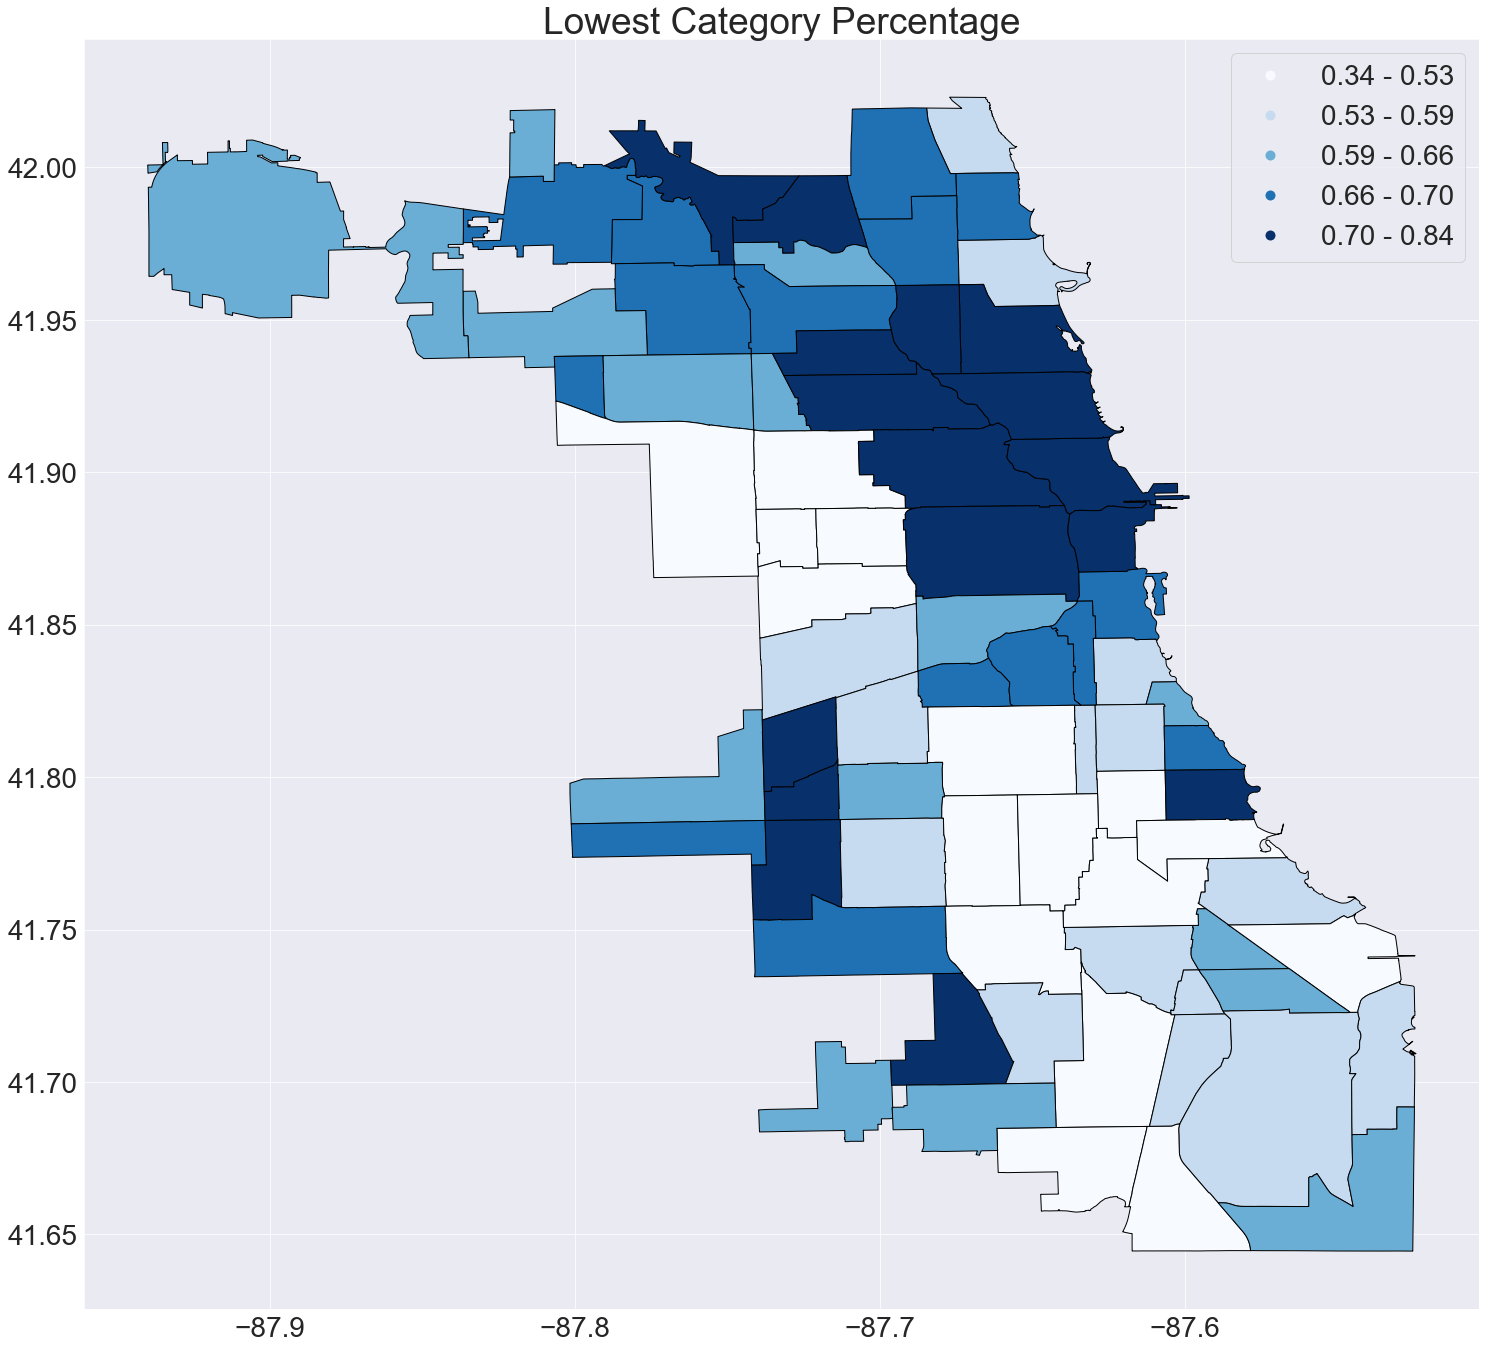

In [64]:
axes=boundary.plot(column='lo_per',figsize=(25,25),legend=True,colormap=plt.cm.Blues,scheme='quantiles',edgecolor='black')
axes.set_title("Lowest Category Percentage",fontsize=37)

In [79]:
boundary.rename(columns={"PER CAPITA INCOME ": "pci"},inplace=True)

Text(0,0.5,'Per Capita Income')

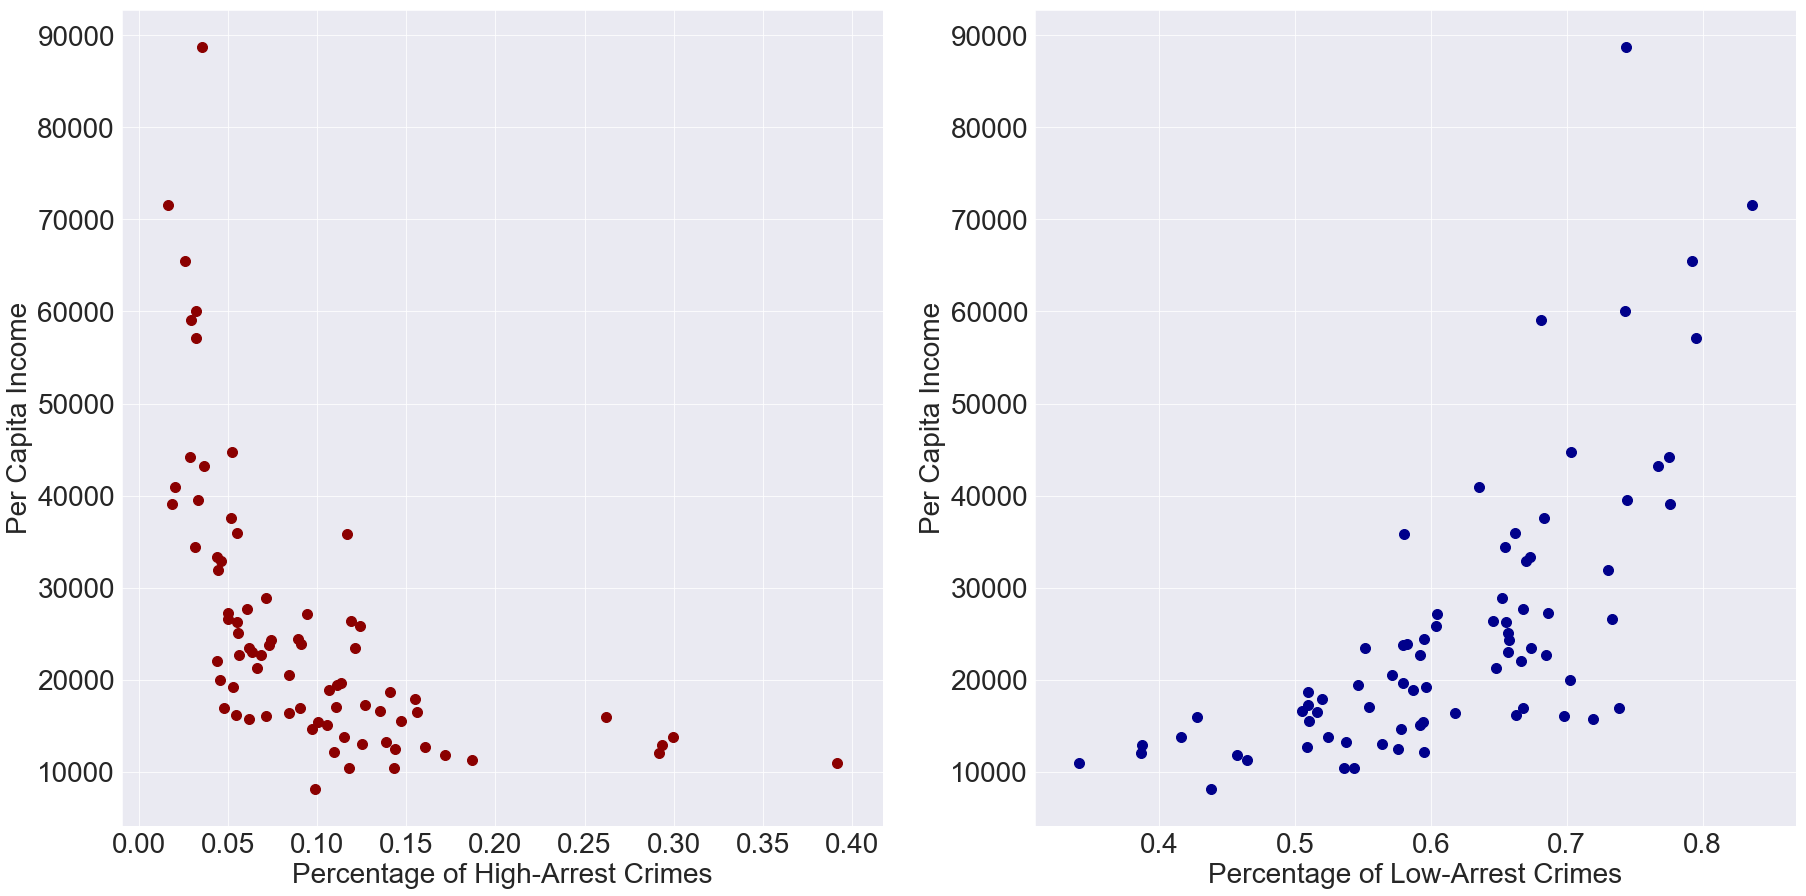

In [69]:
fig, ax = plt.subplots(ncols=2, figsize=(30,15))


ax[0]=bound.plot.scatter(x='hi_per', y='PER CAPITA INCOME ', s=100,c='darkred', ax=ax[0])
ax[1]=bound.plot.scatter(x='lo_per', y='PER CAPITA INCOME ', s=100,c='darkblue', ax=ax[1])

ax[0].set_xlabel('Percentage of High-Arrest Crimes')
ax[1].set_xlabel('Percentage of Low-Arrest Crimes')

ax[0].set_ylabel('Per Capita Income')
ax[1].set_ylabel('Per Capita Income')

In [67]:
bound = pd.DataFrame(boundary)

In [88]:
boundary['lo_per']=boundary['lo_per']*100

In [80]:
boundary['pci'].shape

(77,)

In [92]:
boundary['hi_per']=boundary['hi_per']* 100

In [93]:
boundary['hi_per']

0      7.286124
1     12.426729
2     14.307032
3     12.150619
4      5.544887
5      5.177330
6     11.491758
7      1.867786
8     14.120331
9      9.121562
10     6.062920
11     2.866593
12     4.991772
13     6.618987
14     7.411358
15     5.021702
16     5.491361
17     4.411765
18    10.077164
19     6.385567
20    10.559983
21     4.583684
22     4.477895
23    29.966947
24     3.677026
25    26.192715
26    39.124018
27    29.360038
28     5.227264
29    29.150814
        ...    
47     3.218469
48     8.461417
49     9.740318
50    11.073343
51    15.611983
52     9.873451
53     6.865585
54    11.928710
55     7.156245
56    12.541275
57     5.616706
58    16.069884
59     6.165971
60    10.973043
61     5.568742
62     4.776440
63    13.874430
64    18.672062
65    17.195670
66    12.675452
67     1.666540
68     6.168967
69    14.731877
70     3.340372
71    11.328104
72     3.170656
73     9.458241
74     5.311904
75     4.423611
76     2.068474
Name: hi_per, Length: 77

In [94]:
hilo_pci=smf.ols('pci  ~  hi_per + np.power(hi_per,2)',boundary).fit()
hilo_pci.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pci   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     37.68
Date:                Fri, 10 May 2019   Prob (F-statistic):           5.18e-12
Time:                        09:46:56   Log-Likelihood:                -823.62
No. Observations:                  77   AIC:                             1653.
Df Residuals:                      74   BIC:                             1660.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            5.194e+04   3441.345     15.093      0.000    4.51e+04    5.88e+04
hi_per              -3942.7153    535.910     -7.357      0.000   -5010.540   -2874.891
np.power(hi_per, 2)    83.6771     15.478      5.406      0.000      52.837     114.517
==============================================================================
Omnibus:                       37.127   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.519
Skew:                           1.551   Prob(JB):                     2.01e-23
Kurtosis:                       7.792   Cond. No.                         786.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
boundary[lo_pci]

In [11]:
districts = pd.read_excel("data_district_officers.xlsx")

In [12]:
districts.head()

,District,Officers,Trash,Population
0,1,313,"32,33,35",116117
1,2,323,"41,40,39,36,38,",90701
2,3,321,"42,69",56269
3,4,327,"55,51,52,46,48,47,45,43",181335
4,5,332,"53,54,50,49",118065


In [13]:
districts['ppl_per_officer']=districts['Population']/districts['Officers']

In [14]:
districts

,District,Officers,Trash,Population,ppl_per_officer
0,1,313,"32,33,35",116117,370.980831
1,2,323,"41,40,39,36,38,",90701,280.808050
2,3,321,"42,69",56269,175.292835
3,4,327,"55,51,52,46,48,47,45,43",181335,554.541284
4,5,332,"53,54,50,49",118065,355.617470
5,6,341,"71,44",76761,225.105572
6,7,426,"67,68",56818,133.375587
7,8,394,"56,57,64,62,66,65,70",224003,568.535533
8,9,336,"58,59,60,34,63,61,37",182084,541.916667
9,10,356,"29,30,31",85575,240.379213


In [15]:
dis_bound = geopandas.read_file('geo_dis_boundaries.geojson')

In [16]:
districts.rename(columns={"District": "dist_num"},inplace=True)
dis_bound.sort_values('dist_num')

,dist_label,dist_num,geometry
21,1ST,1,(POLYGON ((-87.62437192003144 41.8888573107525...
20,10TH,10,(POLYGON ((-87.68603841415118 41.8666125442186...
15,11TH,11,(POLYGON ((-87.70678940036518 41.9028319150730...
14,12TH,12,(POLYGON ((-87.65742450906868 41.9035086463092...
6,14TH,14,(POLYGON ((-87.69256666010364 41.9394265689430...
24,15TH,15,(POLYGON ((-87.74597835776501 41.9023523319365...
11,16TH,16,"(POLYGON ((-87.80654723263612 42.01896458274, ..."
0,17TH,17,(POLYGON ((-87.71067089391354 41.9973656553694...
13,18TH,18,"(POLYGON ((-87.63068325269062 41.92622745644, ..."
4,19TH,19,(POLYGON ((-87.64491798568677 41.9697270938148...


In [17]:
dis_bound['dist_num']=dis_bound['dist_num'].astype(int)

In [18]:
dis_bound = pd.merge(dis_bound, districts, on="dist_num", how="inner")
dis_bound

,dist_label,dist_num,geometry,Officers,Trash,Population,ppl_per_officer
0,17TH,17,(POLYGON ((-87.71067089391354 41.9973656553694...,246,"13,14,16,21",181347,737.182927
1,20TH,20,(POLYGON ((-87.66029423572358 41.9909163385397...,247,"4,77",96913,392.360324
2,19TH,19,(POLYGON ((-87.64491798568677 41.9697270938148...,389,"3,5,6",191595,492.532134
3,25TH,25,(POLYGON ((-87.71739917372257 41.9392162133135...,337,"18,19,22,20,(1/4)(25)",223751,663.949555
4,14TH,14,(POLYGON ((-87.69256666010364 41.9394265689430...,243,22,73757,303.526749
5,22ND,22,(POLYGON ((-87.63631615604635 41.7361768878879...,271,"74,75,72,73",153263,565.546125
6,5TH,5,(POLYGON ((-87.58775992207175 41.7223054526069...,332,"53,54,50,49",118065,355.617470
7,24TH,24,(POLYGON ((-87.6742430002891 42.02300493835655...,272,"1,2",116050,426.654412
8,16TH,16,"(POLYGON ((-87.80654723263612 42.01896458274, ...",266,"15,17,11,12,10,9,76",177469,667.176692
9,8TH,8,(POLYGON ((-87.71441587916783 41.8286139733522...,394,"56,57,64,62,66,65,70",224003,568.535533


In [19]:
dis_bound['off_per_resident']=dis_bound['Officers']/dis_bound['Population']

In [20]:
dis_bound

,dist_label,dist_num,geometry,Officers,Trash,Population,ppl_per_officer,off_per_resident
0,17TH,17,(POLYGON ((-87.71067089391354 41.9973656553694...,246,"13,14,16,21",181347,737.182927,0.001357
1,20TH,20,(POLYGON ((-87.66029423572358 41.9909163385397...,247,"4,77",96913,392.360324,0.002549
2,19TH,19,(POLYGON ((-87.64491798568677 41.9697270938148...,389,"3,5,6",191595,492.532134,0.002030
3,25TH,25,(POLYGON ((-87.71739917372257 41.9392162133135...,337,"18,19,22,20,(1/4)(25)",223751,663.949555,0.001506
4,14TH,14,(POLYGON ((-87.69256666010364 41.9394265689430...,243,22,73757,303.526749,0.003295
5,22ND,22,(POLYGON ((-87.63631615604635 41.7361768878879...,271,"74,75,72,73",153263,565.546125,0.001768
6,5TH,5,(POLYGON ((-87.58775992207175 41.7223054526069...,332,"53,54,50,49",118065,355.617470,0.002812
7,24TH,24,(POLYGON ((-87.6742430002891 42.02300493835655...,272,"1,2",116050,426.654412,0.002344
8,16TH,16,"(POLYGON ((-87.80654723263612 42.01896458274, ...",266,"15,17,11,12,10,9,76",177469,667.176692,0.001499
9,8TH,8,(POLYGON ((-87.71441587916783 41.8286139733522...,394,"56,57,64,62,66,65,70",224003,568.535533,0.001759


In [21]:
type(dis_bound)
type(dis_bound.geometry)
type(dis_bound.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

/anaconda3/lib/python2.7/site-packages/geopandas/plotting.py:396: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


Text(0.5,1,'Residents per Officer')

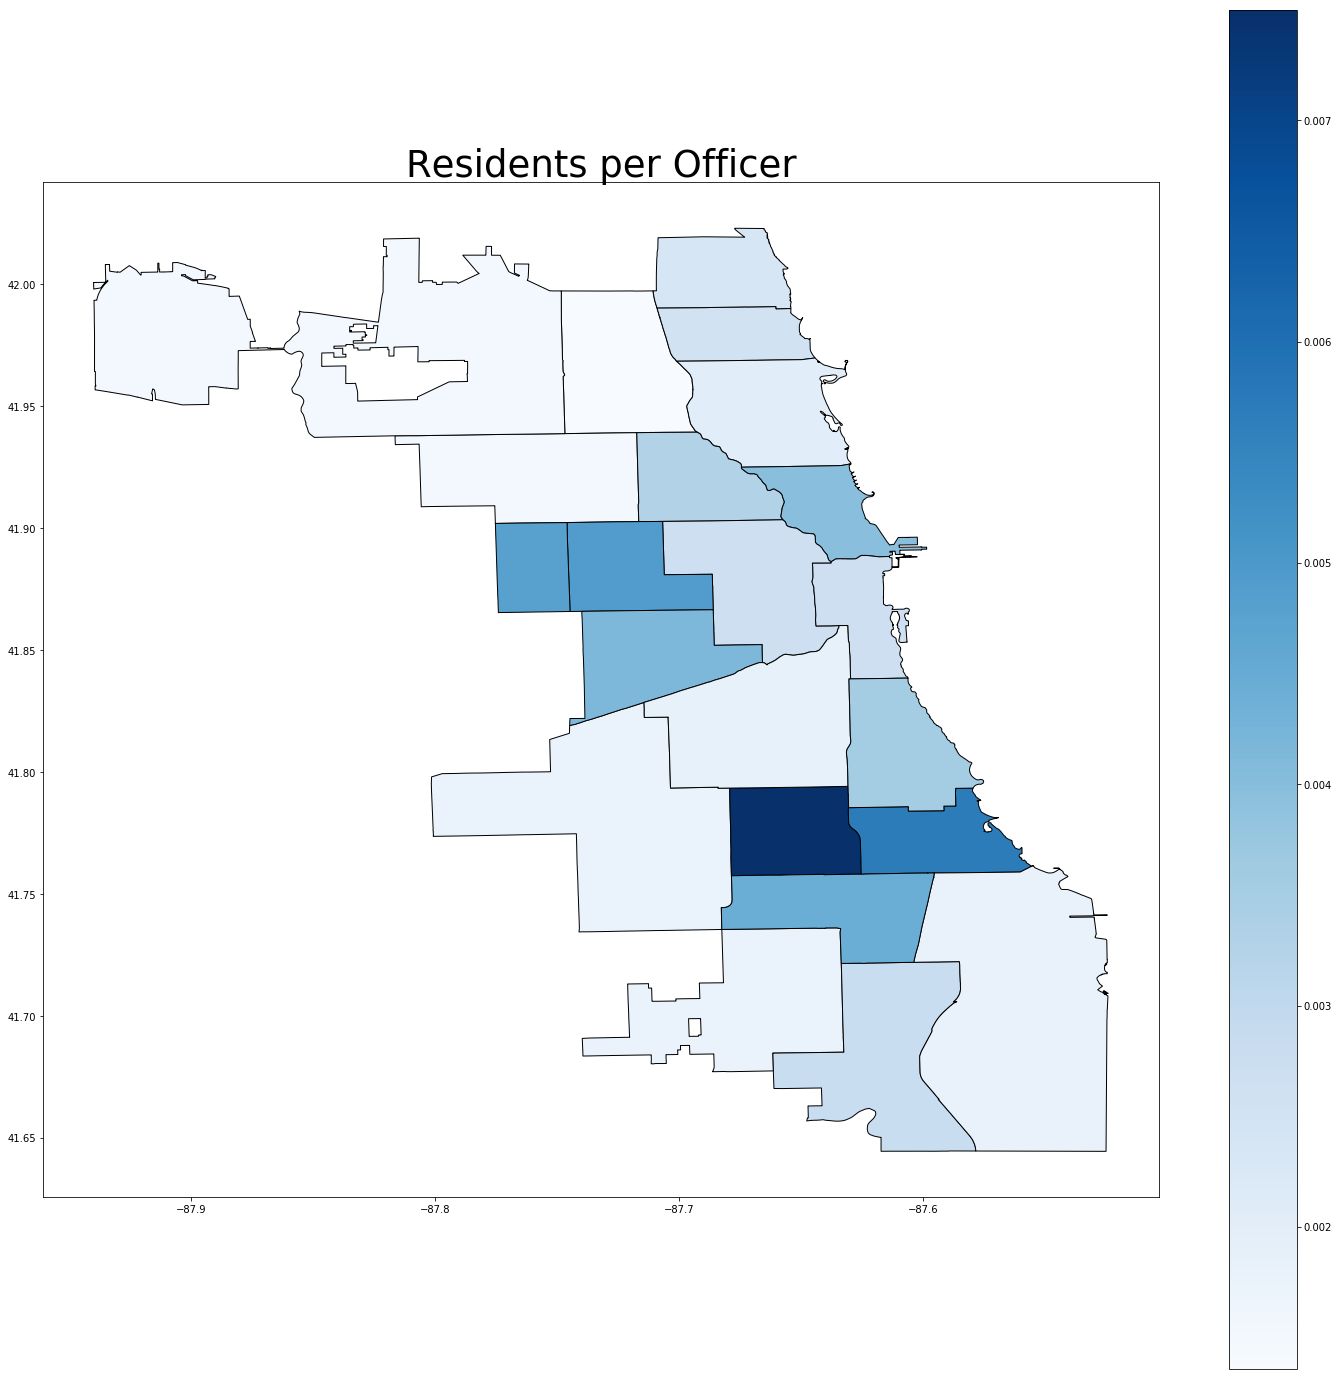

In [22]:
axes=dis_bound.plot(column='off_per_resident',figsize=(25,25),legend=True,colormap=plt.cm.Blues,edgecolor='black')
axes.set_title("Residents per Officer",fontsize=37)
#plt.savefig("FINAL_com_rate.csv")